# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your model using train-test-split.


## Objectives

You will be able to:

- Calculate the mean squared error (MSE) as a measure of predictive performance
- Validate the model using the test data


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features["B"]
logdis = np.log(boston_features["DIS"])
loglstat = np.log(boston_features["LSTAT"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [112]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = boston.target

## Perform a train-test-split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [115]:
print(len(x_train), len(y_train), len(x_test), len(y_test))


404 404 102 102


## Apply your model to the train set

#### Importing and initializing the model class

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
linreg = LinearRegression()

#### Fitting the model to the train data

In [118]:
result = linreg.fit(x_train, y_train)

In [119]:
result.coef_

array([ 2.72666076,  3.67208742, -6.04741926,  4.38706479, -6.13151226])

#### Calculating predictions on the train set, and on the test set

In [120]:
y_hat_train = linreg.predict(x_train)
y_hat_test = linreg.predict(x_test)

#### Calculating your residuals

In [121]:
train_res = y_hat_train - y_train
test_res = y_hat_test - y_test

#### Calculating the Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
mean_squared_error(y_train, y_hat_train)

21.166960185387655

In [124]:
mean_squared_error(y_test, y_hat_test)

23.946729697075426

If your test error is substantially worse then our train error, this is a sign that our model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

In [125]:
training_error = []
testing_error = []
training_size = []
for i in np.linspace(0.2,0.9,20):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i)
    training_size.append(len(x_train))
    linreg = LinearRegression()
    result = linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_hat_train))
    testing_error.append(mean_squared_error(y_test, y_hat_test))
    print(f'when test size is {i}')
    print(f'train MSR is {mean_squared_error(y_train, y_hat_train)}')
    print(f'test MSR is {mean_squared_error(y_test, y_hat_test)}')
    print('--------------')
    

when test size is 0.2
train MSR is 22.085917713454993
test MSR is 20.793532315035126
--------------
when test size is 0.2368421052631579
train MSR is 18.656743530058232
test MSR is 31.7848738321031
--------------
when test size is 0.2736842105263158
train MSR is 21.572433819672842
test MSR is 22.31596250646466
--------------
when test size is 0.31052631578947365
train MSR is 21.297168910041663
test MSR is 23.256839076341077
--------------
when test size is 0.34736842105263155
train MSR is 22.579893652767296
test MSR is 20.6457236422784
--------------
when test size is 0.38421052631578945
train MSR is 22.25140220645042
test MSR is 21.53205980469985
--------------
when test size is 0.42105263157894735
train MSR is 22.38846035484024
test MSR is 21.823504215359605
--------------
when test size is 0.45789473684210524
train MSR is 23.038803162783765
test MSR is 20.44780953719039
--------------
when test size is 0.49473684210526314
train MSR is 19.740365854856087
test MSR is 24.77714289769112

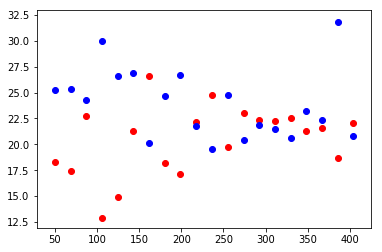

In [126]:
import matplotlib.pyplot as plt
plt.scatter(training_size, training_error, c = 'r')
plt.scatter(training_size, testing_error, c = 'b')

# Evaluating the effect of train-test split size: extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

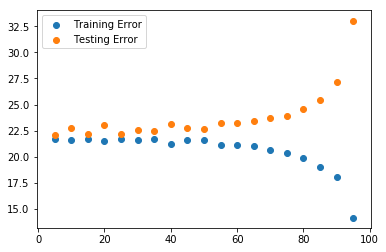

In [13]:
training_error = []
testing_error = []
training_size = []
for i in np.linspace(0.2,0.9,20):
    train_error = []
    
    for j in range(100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = i)
    linreg = LinearRegression()
    result = linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)
    y_hat_test = linreg.predict(x_test)
    training_error.append(mean_squared_error(y_train, y_hat_train))
    testing_error.append(mean_squared_error(y_test, y_hat_test))
    print(f'when test size is {i}')
    print(f'train MSR is {mean_squared_error(y_train, y_hat_train)}')
    print(f'test MSR is {mean_squared_error(y_test, y_hat_test)}')
    print('--------------')
    

What's happening here? evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge on MSE and on using train-test-split.